In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train[0].shape

(28, 28)

* Each image is a 28 x 28 pixel image.
* So there are total 28 x 28 rows rows as input.
* And it contains the value of the pixel in the image.
* Pixel values range between 0 to 255.
* We have to bring it in the range 0 to 1 by dividing all the pixel values by 255.

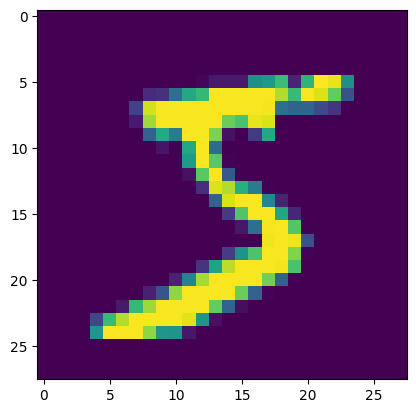

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
# bringing pixel values in the range 0 - 1
X_train = X_train/255
X_test = X_test/255

In [8]:
# X_train[0]

In [9]:
model = Sequential()

* As we have the pixel values in the form of an array we have to first Flatten it into 28 x 28 = 784 input.

In [10]:
# Flatenning pixel values
model.add(Flatten(input_shape = (28,28)))

'''we dont need to specify input_dim to Dense layer here because the output of Flatten is 784
will be given to the Dense layer'''

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# In sparse_categorical_crossentropy we dont have to one hot encode our ouput labels
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [12]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [13]:
history = model.fit(X_train, y_train,
                    epochs = 20,
                    validation_split = 0.2,
                    batch_size = 10,
                    callbacks = early_stopping)

Epoch 1/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8831 - loss: 0.3935 - val_accuracy: 0.9618 - val_loss: 0.1235
Epoch 2/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9665 - loss: 0.1087 - val_accuracy: 0.9701 - val_loss: 0.1029
Epoch 3/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9793 - loss: 0.0667 - val_accuracy: 0.9700 - val_loss: 0.0998
Epoch 4/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.9703 - val_loss: 0.1130
Epoch 5/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9733 - val_loss: 0.1013
Epoch 6/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9741 - val_loss: 0.1092
Epoch 7/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9710 - val_loss: 0.1141
Epoch 8/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9935 - loss: 0

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

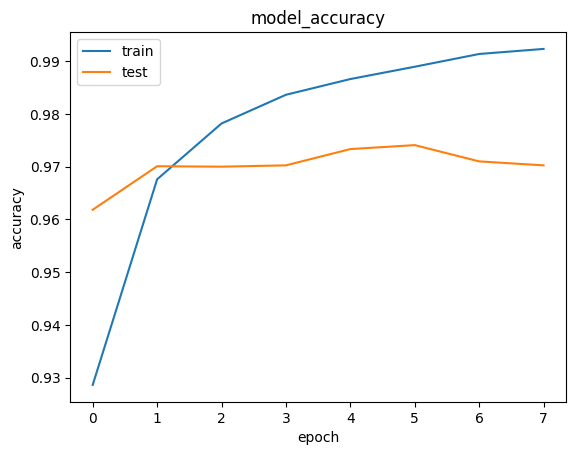

In [16]:
# summarize model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

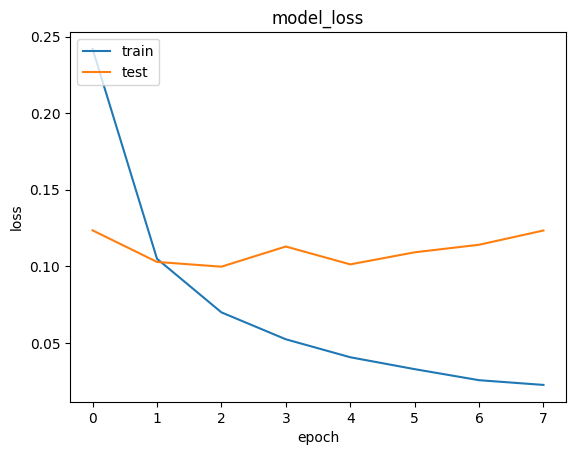

In [17]:
# summarize model history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [19]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
# Convert probabilities to class labels
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.9739
[[ 968    1    1    1    1    2    2    1    3    0]
 [   0 1111    3    2    0    0    3    1   14    1]
 [   6    0  994    5    1    0    2    7   16    1]
 [   1    0    5  976    0    6    0    5    6   11]
 [   2    0    3    0  953    0    2    6    2   14]
 [   2    0    0    5    1  863    7    0    7    7]
 [   7    3    1    1    3    7  933    0    3    0]
 [   1    3    6    4    1    0    0  999    4   10]
 [   6    0    2    0    2    1    3    2  953    5]
 [   0    1    0    2    8    1    1    4    3  989]]
